## Data Wrangling- We rate dogs


### Gather data

In [ ]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import timeit
import sys

In [10]:
# read the dataframe
df_archieve =pd.read_csv('twitter-archive-enhanced(1).csv')
df_archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
# enlarge the dataframe
pd.set_option('display.max_colwidth', 500)
df_archieve.query('name=="a"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [24]:
df_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# download image_predictions using requests

url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_predictions.shape

(2075, 12)

In [6]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = id.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

KeyboardInterrupt: 

In [8]:
CONSUMER_KEY = "xxxxx "
CONSUMER_SECRET = "xxxxx"
OAUTH_TOKEN = "xxxxx"
OAUTH_TOKEN_SECRET = "xxxxx"
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)
t =len(id.tweet_id.values)
tweet = api.get_status(t,tweet_mode='extended')
print(tweet.text)

TweepError: [{'code': 32, 'message': 'Could not authenticate you.'}]

In [5]:
start = timeit.timeit()

# store data
status_data = []
# store errors
errors = []

# for each tweet_id 
for tweet_id in tweet_ids:
    print(tweet_id, len(status_data))
    # try to get the status data 
    try:
        tweet = api.get_status(tweet_id, tweet_mode="extended")
#         tweet = tweet._json
        status_data.append(tweet)
    except: # Catch *all* exceptions and save them 
        e = sys.exc_info()[0]
        print(e)
        errors.append((tweet_id, e))

end = timeit.timeit()
print("Total Time Taken: ", end-start, ".")

892420643555336193 0
892177421306343426 1
891815181378084864 2
891689557279858688 3
891327558926688256 4
891087950875897856 5
890971913173991426 6
890729181411237888 7
890609185150312448 8
890240255349198849 9
890006608113172480 10
889880896479866881 11
889665388333682689 12
889638837579907072 13
889531135344209921 14
889278841981685760 15
888917238123831296 16
888804989199671297 17
888554962724278272 18
888202515573088257 19
<class 'tweepy.error.TweepError'>
888078434458587136 19
887705289381826560 20
887517139158093824 21
887473957103951883 22
887343217045368832 23
887101392804085760 24
886983233522544640 25
886736880519319552 26
886680336477933568 27
886366144734445568 28
886267009285017600 29
886258384151887873 30
886054160059072513 31
885984800019947520 32
885528943205470208 33
885518971528720385 34
885311592912609280 35
885167619883638784 36
884925521741709313 37
884876753390489601 38
884562892145688576 39
884441805382717440 40
884247878851493888 41
884162670584377345 42
88383812

In [6]:
with open("tweet json copy", "a",
         encoding="utf-8") as file:
    for tweet_status in status_data:
        tweet_json = tweet_status._json
        json.dump(tweet_json, file)
        file.write("\n")


In [7]:
df_list = [] 
for tweet_status in status_data:
    df_list.append(tweet_status._json)

In [8]:
df=pd.DataFrame(df_list)

In [81]:
# save the dataframe obtained after adding the list to the dataframe
df.to_csv('dataframe.csv',index=False)

In [4]:
df = pd.read_csv('dataframe.csv')

In [8]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36804,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7846,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31683,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5808,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23873,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3846,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40133,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8012,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38327,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8656,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [39]:
df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2333.000000,2.333000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2333.000000
mean,7680.682383,7.419279e+17,7.440692e+17,2.040329e+16,8.113972e+17,2763.232319
std,11921.180299,6.820607e+16,7.524295e+16,1.260797e+17,6.295843e+16,4676.090662
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1333.000000,6.782786e+17,6.757073e+17,3.589728e+08,7.761338e+17,555.000000
50%,3345.000000,7.184547e+17,7.032559e+17,4.196984e+09,8.281173e+17,1295.000000
75%,9436.000000,7.986654e+17,8.233264e+17,4.196984e+09,8.637581e+17,3213.000000
max,159069.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79357.000000


### Quality
#### Twitter archeve table
* Null values in the columns(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls)
* null values represented as None(doggo,floofer,pupper,puppo,name)
* incorrect names in names column('a','quite','the','an')
* Erroranous datatypes(tweet_id,timestamp)
#### Image_predictions table
* erroneous datatypes(tweet_id)
#### Json_data table
* Null values in columns(contributors,coordinates,in_reply_to_screen_name,in_reply_to_status_id,extended_entities,retweeted_status,quoted_status_permalink,quoted_status_id_str,quoted_status_id,quoted_status,possibly_sensitive,possibly_sensitive_appealable)
* erroneous datatypes(created_at,id,id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id)
* Invalid letters in lang column
* Massive change in the values of favorite_count column.
* Nulls in (contributers,coordinates,geo,in_reply_to_screen_name,in_reply_to_status_id_str,place,)
### Tidiness
* Dictionaries given in coulmns(entities,extended_entities, user,quoted_status_permalink,retweeted_status).
* retweets in archieved and df table not required.
* There are 4 seperate columns of dog types instead of 1.

# Clean

In [12]:
# create a copy of the dataframe
archieve_clean = df_archieve.copy()
predictions_clean = df_predictions.copy()
df_clean= df.copy()

### Archieves table: Null values

#### Define

Run a loop to replace the null values with None in the columns

#### Code

In [82]:
columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',]
for null in columns:
    archieve_clean[null].fillna('None',inplace=True)

#### Test

In [83]:
archieve_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_category,dog_stage
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,,NaN
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,,NaN
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,,NaN
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,,NaN
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,,NaN


### Define: Errorinous datatypes

Convert the datatypes of tweet_id and timestamp column

In [84]:
# use the astype function to convert the datatypes
archieve_clean.timestamp =pd.to_datetime(archieve_clean.timestamp)
archieve_clean.tweet_id = archieve_clean.tweet_id.astype('object')

#### Test

In [36]:
archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

### Define: Incorrect names
Replace the names with single letters to None with the help of replace function

### Code

In [85]:
archieve_clean.name.replace(['a','an','the','quite'],'None',inplace=True)

### Test

In [38]:
archieve_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### Predictions table: Erroranious datatypes

#### Define

Convert the datatype of tweet_id column from integer to object using astype function

In [86]:
predictions_clean.tweet_id=predictions_clean.tweet_id.astype('object',inplace=True)

In [63]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Json_data table

#### Define

Convert replace the null values with None across the columns by running a loop

#### Code

In [87]:
columns=['retweet_count','favorite_count','in_reply_to_status_id_str','in_reply_to_user_id_str','place','in_reply_to_user_id','geo','in_reply_to_screen_name','in_reply_to_status_id','extended_entities','retweeted_status','quoted_status_permalink','quoted_status_id_str','quoted_status_id','quoted_status','possibly_sensitive','possibly_sensitive_appealable','contributors','coordinates']
for null in columns:
    
    df_clean[null].fillna('None',inplace=True)

### Test

In [42]:
df_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36804,False,This is Phineas. He's a mystical boy. Only eve...,None,...,None,None,None,None,7846,False,None,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31683,False,This is Tilly. She's just checking pup on you....,None,...,None,None,None,None,5808,False,None,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23873,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,None,None,None,None,3846,False,None,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40133,False,This is Darla. She commenced a snooze mid meal...,None,...,None,None,None,None,8012,False,None,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38327,False,This is Franklin. He would like you to stop ca...,None,...,None,None,None,None,8656,False,None,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Define

#### Errorionous datatypes: Convert the created_at datype from object to datetime using datetime function

### Code

In [88]:
# convert the datetime and object column data types
df_clean.created_at = pd.to_datetime(df_clean.created_at)
df_clean.id= df_clean.id.astype('object')
df_clean.id_str= df_clean.id_str.astype('object')

### Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     2333 non-null object
coordinates                      2333 non-null object
created_at                       2333 non-null datetime64[ns]
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2333 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              2333 non-null object
id                               2333 non-null object
id_str                           2333 non-null object
in_reply_to_screen_name          2333 non-null object
in_reply_to_status_id            2333 non-null object
in_reply_to_status_id_str        2333 non-null object
in_reply_to_user_id              2333 non-null object
in_reply_to_user_id_str 

### Define

add the columns values of doggo,pupper,floofer,puppo to a single column called dog_category. 

### Code

In [89]:
# Replace the none values with empty strings and add the columns to create a single column
archieve_clean.doggo.replace('None', '', inplace = True)
archieve_clean.floofer.replace('None', '', inplace = True)
archieve_clean.pupper.replace('None', '', inplace = True)
archieve_clean.puppo.replace('None', '', inplace = True)
archieve_clean['dog_category'] = archieve_clean.doggo + archieve_clean.floofer + archieve_clean.pupper + archieve_clean.puppo

In [17]:
archieve_clean['dog_category'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_category, dtype: int64

In [90]:
archieve_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_category,dog_stage
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,,NaN
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,,NaN
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,,NaN
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,,NaN
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,,NaN


In [91]:
# Drop irrelevant columns
archieve_clean.drop(['doggo','puppo','floofer','pupper','dog_stage'],axis=1,inplace=True)

### Test

In [19]:
archieve_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_category
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


## Define 

Drop unnecessary columns of archieve_clean and predictions table

## Code

In [92]:
# drop unnecessary columns
archieve_clean.drop(['retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [93]:
predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

## Test

In [94]:
archieve_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,


In [95]:
predictions_clean.head(2)

,tweet_id,jpg_url,img_num
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


In [16]:
# Add to columns to from the df_clean dataset to archieve data frame
archieve_clean['favorite_count']= df_clean['favorite_count']
archieve_clean['retweet_count']= df_clean['retweet_count']

In [26]:
archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_category                  2356 non-null object
favorite_count                2333 non-null float64
retweet_count                 2333 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory us

In [96]:
archieve_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [117]:
# join the dataframes to get the image column
twitter_archive_master=pd.merge(archieve_clean,predictions_clean,on ='tweet_id',how='inner')

In [118]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_category,favorite_count,retweet_count,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,36804.0,7846.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,31683.0,5808.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,23873.0,3846.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,40133.0,8012.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,38327.0,8656.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


In [103]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         2075 non-null object
in_reply_to_user_id           2075 non-null object
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           2075 non-null object
retweeted_status_user_id      2075 non-null object
retweeted_status_timestamp    2075 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
dog_category                  2075 non-null object
favorite_count                2052 non-null float64
retweet_count                 2052 non-null float64
jpg_url                       2075 non-null object
img_num           

In [122]:
twitter_archive_master.to_csv('twitter_archive_master',index=False)

In [19]:
df_twitter=pd.read_csv('twitter_archive_master')

In [9]:
df_twitter

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_category,favorite_count,retweet_count,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,36804.0,7846.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,31683.0,5808.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,23873.0,3846.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,40133.0,8012.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,38327.0,8656.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,19280.0,2886.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,None,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,11239.0,1901.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,62054.0,17515.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,None,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,26524.0,3978.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,None,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,30375.0,6816.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1


## Analysis and Visualisation

### The categories with highest number of ratings

In [37]:
# groupby dog_category and rating numerator to find the most rated dogs
highest_rated= df_twitter.groupby(['dog_category','rating_numerator'])

In [38]:
highest_rated.first()

tweet_id            timestamp  \
dog_category rating_numerator                                            
doggo        8                 768193404517830656  2016-08-23 21:09:14   
             10                757393109802180609  2016-07-25 01:52:43   
             11                829449946868879360  2017-02-08 22:00:52   
             12                884162670584377345  2017-07-09 21:29:42   
             13                858843525470990336  2017-05-01 00:40:27   
             14                890240255349198849  2017-07-26 15:59:51   
doggofloofer 11                854010172552949760  2017-04-17 16:34:26   
doggopupper  5                 751583847268179968  2016-07-09 01:08:47   
             10                785639753186217984  2016-10-11 00:34:48   
             11                802265048156610565  2016-11-25 21:37:47   
             12                808106460588765185  2016-12-12 00:29:28   
             13                817777686764523521  2017-01-07 16:59:28   
doggopuppo   13                855851453814013952  2017-04-22 18:31:02   
floofer      10                733822306246479872  2016-05-21 00:50:46   
             11                685307451701334016  2016-01-08 03:50:03   
             12                800388270626521089  2016-11-20 17:20:08   
             13                883360690899218434  2017-07-07 16:22:55   
pupper       3                 693590843962331137  2016-01-31 00:25:18   
             5                 684880619965411328  2016-01-06 23:33:58   
             6                 672614745925664768  2015-12-04 03:13:46   
             7                 692417313023332352  2016-01-27 18:42:06   
             8                 750506206503038976  2016-07-06 01:46:38   
             9                 750383411068534784  2016-07-05 17:38:41   
             10                839290600511926273  2017-03-08 01:44:07   
             11                818588835076603904  2017-01-09 22:42:41   
             12                886366144734445568  2017-07-15 23:25:31   
             13                874296783580663808  2017-06-12 16:06:11   
             14                881536004380872706  2017-07-02 15:32:16   
             27                778027034220126208  2016-09-20 00:24:34   
puppo        9                 744995568523612160  2016-06-20 20:49:19   
             10                756275833623502848  2016-07-21 23:53:04   
             11                752519690950500352  2016-07-11 15:07:30   
             12                867421006826221569  2017-05-24 16:44:18   
             13                889665388333682689  2017-07-25 01:55:32   
             14                825535076884762624  2017-01-29 02:44:34   

                                                                          source  \
dog_category rating_numerator                                                      
doggo        8                 <a href="http://twitter.com/download/iphone" r...   
             10                <a href="http://twitter.com/download/iphone" r...   
             11                <a href="http://twitter.com/download/iphone" r...   
             12                <a href="http://twitter.com/download/iphone" r...   
             13                <a href="http://twitter.com/download/iphone" r...   
             14                <a href="http://twitter.com/download/iphone" r...   
doggofloofer 11                <a href="http://twitter.com/download/iphone" r...   
doggopupper  5                 <a href="http://twitter.com/download/iphone" r...   
             10                <a href="http://twitter.com/download/iphone" r...   
             11                <a href="http://twitter.com/download/iphone" r...   
             12                <a href="http://twitter.com/download/iphone" r...   
             13                <a href="http://twitter.com/download/iphone" r...   
doggopuppo   13                <a href="http://twitter.com/download/iphone" r...   
floofer      10                <a href="ht

In [29]:
# filter the categories to calculate the mean
df_twitter.query('dog_category=="doggo"').rating_numerator.mean(skipna=True)

11.970149253731343

In [30]:
df_twitter.query('dog_category=="pupper"').rating_numerator.mean(skipna=True)

10.75829383886256

In [31]:
df_twitter.query('dog_category=="floofer"').rating_numerator.mean(skipna=True)

12.0

In [32]:
df_twitter.query('dog_category=="puppo"').rating_numerator.mean(skipna=True)

12.0

### categories with highest favorite_count

In [54]:
# find favorite_count mean of all 4 categories 
df_twitter.query('dog_category=="puppo"')['favorite_count'].mean()

16400.043478260868

In [56]:
df_twitter.query('dog_category=="doggo"')['favorite_count'].mean()

9036.34328358209

In [58]:
df_twitter.query('dog_category=="floofer"')['favorite_count'].mean()

15181.142857142857

In [59]:
df_twitter.query('dog_category=="pupper"')['favorite_count'].mean()

6438.260663507109

In [41]:
# groupby with favorite_count to find the dogs with most number of favorite count
favorite_dog =df_twitter.groupby(['dog_category','favorite_count'])

In [42]:
favorite_dog.first()

tweet_id            timestamp  \
dog_category favorite_count                                            
doggo        0.0             846514051647705089  2017-03-28 00:07:32   
             220.0           858843525470990336  2017-05-01 00:40:27   
             720.0           752660715232722944  2016-07-12 00:27:52   
             3047.0          727644517743104000  2016-05-03 23:42:26   
             3339.0          716080869887381504  2016-04-02 01:52:38   
             3439.0          748692773788876800  2016-07-01 01:40:41   
             3637.0          760893934457552897  2016-08-03 17:43:45   
             4039.0          758828659922702336  2016-07-29 00:57:05   
             4155.0          732375214819057664  2016-05-17 01:00:32   
             4343.0          719991154352222208  2016-04-12 20:50:42   
             4423.0          752334515931054080  2016-07-11 02:51:40   
             4496.0          745433870967832576  2016-06-22 01:50:58   
             4654.0          752682090207055872  2016-07-12 01:52:49   
             4925.0          735256018284875776  2016-05-24 23:47:49   
             5126.0          724771698126512129  2016-04-26 01:26:53   
             5488.0          821765923262631936  2017-01-18 17:07:18   
             5528.0          748932637671223296  2016-07-01 17:33:49   
             5538.0          813127251579564032  2016-12-25 21:00:18   
             5638.0          755206590534418437  2016-07-19 01:04:16   
             5784.0          819006400881917954  2017-01-11 02:21:57   
             6194.0          768193404517830656  2016-08-23 21:09:14   
             6220.0          775364825476165632  2016-09-12 16:05:54   
             6250.0          739238157791694849  2016-06-04 23:31:25   
             7618.0          786363235746385920  2016-10-13 00:29:39   
             7829.0          757393109802180609  2016-07-25 01:52:43   
             7867.0          813910438903693312  2016-12-28 00:52:25   
             8919.0          744234799360020481  2016-06-18 18:26:18   
             9270.0          795464331001561088  2016-11-07 03:14:10   
             9741.0          869596645499047938  2017-05-30 16:49:31   
             9923.0          821407182352777218  2017-01-17 17:21:47   
...                                         ...                  ...   
pupper       26175.0         831315979191906304  2017-02-14 01:35:49   
             26621.0         882762694511734784  2017-07-06 00:46:41   
             26722.0         704859558691414016  2016-03-02 02:43:09   
             28960.0         824325613288833024  2017-01-25 18:38:36   
             31278.0         866450705531457537  2017-05-22 00:28:40   
             34686.0         839290600511926273  2017-03-08 01:44:07   
             35556.0         685943807276412928  2016-01-09 21:58:42   
             36286.0         696877980375769088  2016-02-09 02:07:12   
             37937.0         756939218950160384  2016-07-23 19:49:07   
             117460.0        742150209887731712  2016-06-13 00:22:53   
puppo        0.0             825535076884762624  2017-01-29 02:44:34   
             2780.0          738537504001953792  2016-06-03 01:07:16   
             3338.0          743253157753532416  2016-06-16 01:25:36   
             3700.0          752519690950500352  2016-07-11 15:07:30   
             5212.0          744995568523612160  2016-06-20 20:49:19   
             6125.0          756275833623502848  2016-07-21 23:53:04   
             6287.0          803773340896923648  2016-11-30 01:31:12   
             6330.0          787717603741622272  2016-10-16 18:11:26   
             7118.0          780931614150983680  2016-09-28 00:46:20   
             8754.0          751132876104687617  2016-07-07 19:16:47   
             9868.0          822872901745569793  2017-01-21 18:26:02   
             13641.0         825026590719483904  2017-01-27 17:04:02   
             14398.0         889531135344209921  2017-07-24 17:02:04   
       

In [137]:
# replace NaN values with None
df_twitter.replace(np.nan,"None",inplace=True)

In [11]:
# most common categories in dog_category column
df_twitter.dog_category.value_counts()

pupper          211
doggo            67
puppo            23
doggopupper      11
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_category, dtype: int64

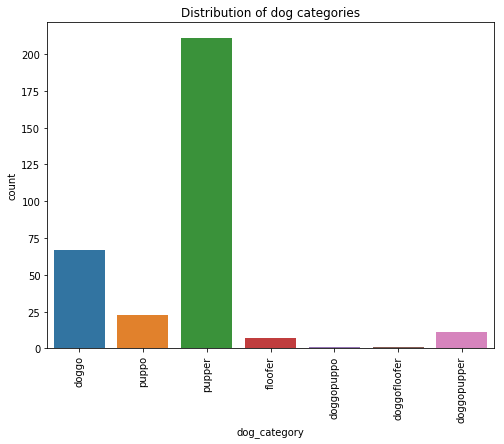

In [77]:
# plot the counts of dog categories
import seaborn as sb
plt.figure(figsize=[8,6])
sb.countplot(data=df_twitter,x= 'dog_category')
plt.xticks(rotation=90)
plt.title('Distribution of dog categories');

### Plot the relationship between favorite acount and rating numeraor of all 4 categories

In [78]:
# filter the dog category
category =df_twitter.query('dog_category=="doggo"')

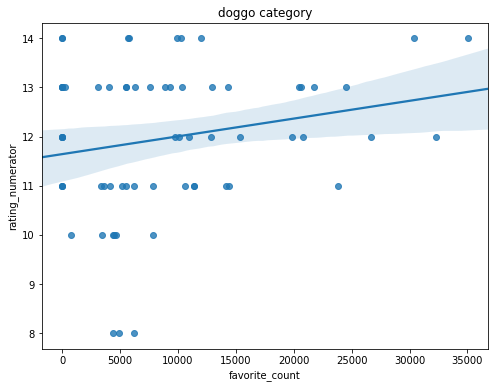

In [79]:
# plot the relationship between favorite_count and rating_numerator
plt.figure(figsize=[8,6])
import seaborn as sb
sb.regplot(data = category,x='favorite_count',y='rating_numerator')
plt.title('doggo category');


In [67]:
category =df_twitter.query('dog_category=="puppo"')

In [64]:
category.sample(10)

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_category,favorite_count,retweet_count,jpg_url,img_num
64,878776093423087618,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,None,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo,28770.0,6642.0,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2
860,743253157753532416,2016-06-16 01:25:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,None,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,3338.0,876.0,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1
775,752519690950500352,2016-07-11 15:07:30,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,None,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,3700.0,1320.0,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3
375,816829038950027264,2017-01-05 02:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Betty. She's assisting ...,4196983835.0,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,puppo,0.0,6051.0,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1
535,790946055508652032,2016-10-25 16:00:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,None,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,puppo,28421.0,10764.0,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1
555,787717603741622272,2016-10-16 18:11:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,None,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,puppo,6330.0,1314.0,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3
755,756275833623502848,2016-07-21 23:53:04,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,None,https://twitter.com/dog_rates/status/756275833...,10,10,None,puppo,6125.0,1626.0,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1
891,738537504001953792,2016-06-03 01:07:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,None,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,puppo,2780.0,528.0,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1
449,803773340896923648,2016-11-30 01:31:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,None,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,puppo,6287.0,857.0,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2
593,780931614150983680,2016-09-28 00:46:20,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,None,https://twitter.com/dog_rates/status/780931614...,13,10,None,puppo,7118.0,1359.0,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1


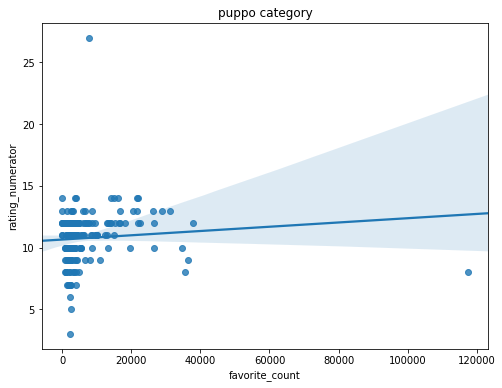

In [76]:
plt.figure(figsize=[8,6])
sb.regplot(data = category,x='favorite_count',y='rating_numerator')
plt.title('puppo category');

In [70]:
category =df_twitter.query('dog_category=="floofer"')

Text(0.5, 1.0, 'floofer category')

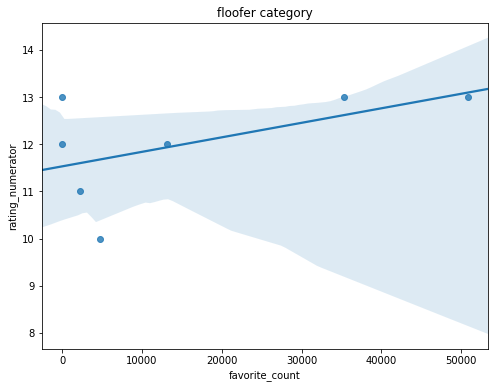

In [71]:
plt.figure(figsize=[8,6])
sb.regplot(data = category,x='favorite_count',y='rating_numerator')
plt.title('floofer category')

In [72]:
category =df_twitter.query('dog_category=="pupper"')

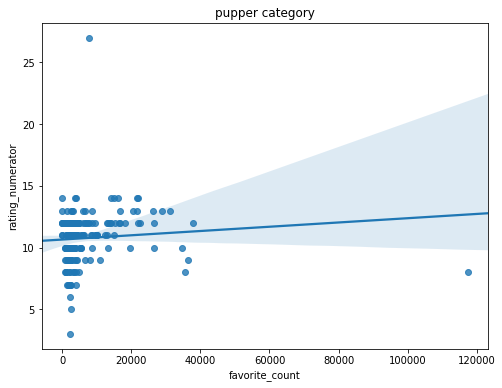

In [75]:
plt.figure(figsize=[8,6])
sb.regplot(data = category,x='favorite_count',y='rating_numerator')
plt.title('pupper category');